<a href="https://colab.research.google.com/github/maitreyeejadhav/Fake-News-Detection/blob/main/svm_fake_news_dataset_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#SVM with first dataset
import numpy as np

In [ ]:
'''class SVM_classifier():       #class is used to create a particular template for an object


# initiating the hyperparameters
  def __init__(self ,learning_rate, no_of_iterations, lambda_parameter):
    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations
    self.lambda_parameter= lambda_parameter

# fitting the dataset to SVM classifier
  def fit(self, X, Y):

    #  m --> number of data points --> number of rows
    # n --> number of input features  --> number of columns
    self.m, self.n = X.shape


    # initiating the weight value and bias value
    self.w = np.zeros(self.n)

    self.b = 0

    self.X = X

    self.Y = Y

    # impementing Gradient Descent algorithm for optimization

    for i in range(self.no_of_iterations):
      self.update_weights()



# function for updating the weight and bias value
  def update_weights(self):

    #label encoding
    y_label = np.where(self.Y <= 0, -1, 1)

    # gradients(dw, db)
    for index, x_i in enumerate(self.X):

      condition = y_label[index] * (np.dot(x_i, self.w) - self.b) >= 1

      if(condition == True):
        dw = 2 * self.lambda_parameter * self.w
        db= 0

      else:
        dw = 2* self.lambda_parameter * self.w - np.dot(x_i, y_label[index])
        db = y_label[index]


      self.w = self.w - self.learning_rate * dw
      self.b = self.b - self.learning_rate * db


# predict the label for a given input value
  def predit(self, X):

    output = np.dot(X, self.w) - self.b

    predicted_labels = np.sign(output)

    y_hat = np.where(predicted_labels <= -1, 0, 1)

    return y_hat

'''

'class SVM_classifier():       #class is used to create a particular template for an object\n\n\n# initiating the hyperparameters\n  def __init__(self ,learning_rate, no_of_iterations, lambda_parameter):\n    self.learning_rate = learning_rate\n    self.no_of_iterations = no_of_iterations\n    self.lambda_parameter= lambda_parameter\n\n# fitting the dataset to SVM classifier\n  def fit(self, X, Y):\n\n    #  m --> number of data points --> number of rows\n    # n --> number of input features  --> number of columns\n    self.m, self.n = X.shape\n\n\n    # initiating the weight value and bias value\n    self.w = np.zeros(self.n)\n\n    self.b = 0\n\n    self.X = X\n\n    self.Y = Y\n\n    # impementing Gradient Descent algorithm for optimization\n\n    for i in range(self.no_of_iterations):\n      self.update_weights()\n\n\n\n# function for updating the weight and bias value\n  def update_weights(self):\n\n    #label encoding\n    y_label = np.where(self.Y <= 0, -1, 1)\n\n    # gradients

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix # for confusion matrix

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
fake_news_data = pd.read_csv('train.csv')

In [ ]:
fake_news_data.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:
#number of rows and columns in the dataset
fake_news_data.shape

(20800, 5)

In [ ]:
#getting the statistical measures of the dataset
fake_news_data.describe()

,id,label
count,20800.000000,20800.000000
mean,10399.500000,0.500625
std,6004.587135,0.500012
min,0.000000,0.000000
25%,5199.750000,0.000000
50%,10399.500000,1.000000
75%,15599.250000,1.000000
max,20799.000000,1.000000


In [ ]:
fake_news_data['label'].value_counts()

label
1    10413
0    10387
Name: count, dtype: int64

1 --> fake news

0 --> real news

In [ ]:
fake_news_data.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [ ]:
fake_news_data = fake_news_data.fillna('')

In [ ]:
fake_news_data['content'] = fake_news_data['author']+' '+fake_news_data['title']

In [ ]:
print(fake_news_data['content'])

0        Darrell Lucus House Dem Aide: We Didn’t Even S...
1        Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...
2        Consortiumnews.com Why the Truth Might Get You...
3        Jessica Purkiss 15 Civilians Killed In Single ...
4        Howard Portnoy Iranian woman jailed for fictio...
                               ...                        
20795    Jerome Hudson Rapper T.I.: Trump a ’Poster Chi...
20796    Benjamin Hoffman N.F.L. Playoffs: Schedule, Ma...
20797    Michael J. de la Merced and Rachel Abrams Macy...
20798    Alex Ansary NATO, Russia To Hold Parallel Exer...
20799              David Swanson What Keeps the F-35 Alive
Name: content, Length: 20800, dtype: object


In [ ]:
# seperating the features and target

features = fake_news_data.drop(columns='label', axis=1)

target = fake_news_data['label']

In [ ]:
print(features)

          id                                              title  \
0          0  House Dem Aide: We Didn’t Even See Comey’s Let...   
1          1  FLYNN: Hillary Clinton, Big Woman on Campus - ...   
2          2                  Why the Truth Might Get You Fired   
3          3  15 Civilians Killed In Single US Airstrike Hav...   
4          4  Iranian woman jailed for fictional unpublished...   
...      ...                                                ...   
20795  20795  Rapper T.I.: Trump a ’Poster Child For White S...   
20796  20796  N.F.L. Playoffs: Schedule, Matchups and Odds -...   
20797  20797  Macy’s Is Said to Receive Takeover Approach by...   
20798  20798  NATO, Russia To Hold Parallel Exercises In Bal...   
20799  20799                          What Keeps the F-35 Alive   

                                          author  \
0                                  Darrell Lucus   
1                                Daniel J. Flynn   
2                             Consortiu

In [ ]:
print(target)

0        1
1        0
2        1
3        1
4        1
        ..
20795    0
20796    0
20797    0
20798    1
20799    1
Name: label, Length: 20800, dtype: int64


In [ ]:
port_stem= PorterStemmer()

In [ ]:
def stemming(content):   #stemming is a function here
  stemmed_content = re.sub('[^a-zA-z]',' ',content)       #removes everything that is not btw aA-zZ(all numbers and puntuations replaced by space)
  stemmed_content = stemmed_content.lower()                #converts all uc to lc to avoid problem during processing
  stemmed_content = stemmed_content.split()                #all words and text will be splitted and converted to list
  stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
  stemmed_content = ' '.join(stemmed_content)
  return stemmed_content

In [ ]:
fake_news_data['content'] = fake_news_data['content'].apply(stemming)

In [ ]:
print(fake_news_data['content'])

0        darrel lucu hous dem aid even see comey letter...
1        daniel j flynn flynn hillari clinton big woman...
2                   consortiumnew com truth might get fire
3        jessica purkiss civilian kill singl us airstri...
4        howard portnoy iranian woman jail fiction unpu...
                               ...                        
20795    jerom hudson rapper trump poster child white s...
20796    benjamin hoffman n f l playoff schedul matchup...
20797    michael j de la merc rachel abram maci said re...
20798    alex ansari nato russia hold parallel exercis ...
20799                            david swanson keep f aliv
Name: content, Length: 20800, dtype: object


In [ ]:
#seperating the data and the label
features = fake_news_data['content'].values
target = fake_news_data['label'].values

In [ ]:
print(features)

['darrel lucu hous dem aid even see comey letter jason chaffetz tweet'
 'daniel j flynn flynn hillari clinton big woman campu breitbart'
 'consortiumnew com truth might get fire' ...
 'michael j de la merc rachel abram maci said receiv takeov approach hudson bay new york time'
 'alex ansari nato russia hold parallel exercis balkan'
 'david swanson keep f aliv']


In [ ]:
print(target)

[1 0 1 ... 0 1 1]


In [ ]:
target.shape

(20800,)

In [ ]:
#converting the textual data to numerical data
vectorizer = TfidfVectorizer()
vectorizer.fit(features)

features =vectorizer.transform(features)

In [ ]:
print(features)

  (0, 15697)	0.28485063562728646
  (0, 13480)	0.2565896679337957
  (0, 8915)	0.3635963806326075
  (0, 8636)	0.29212514087043684
  (0, 7698)	0.24785219520671603
  (0, 7012)	0.21874169089359144
  (0, 4979)	0.233316966909351
  (0, 3795)	0.2705332480845492
  (0, 3603)	0.3598939188262559
  (0, 2962)	0.2468450128533713
  (0, 2485)	0.3676519686797209
  (0, 268)	0.27010124977708766
  (1, 16812)	0.30071745655510157
  (1, 6823)	0.1904660198296849
  (1, 5510)	0.7143299355715573
  (1, 3571)	0.26373768806048464
  (1, 2816)	0.19094574062359204
  (1, 2224)	0.3827320386859759
  (1, 1895)	0.15521974226349364
  (1, 1498)	0.2939891562094648
  (2, 15622)	0.41544962664721613
  (2, 9625)	0.49351492943649944
  (2, 5975)	0.3474613386728292
  (2, 5396)	0.3866530551182615
  (2, 3106)	0.46097489583229645
  :	:
  (20797, 13128)	0.2482526352197606
  (20797, 12350)	0.27263457663336677
  (20797, 12144)	0.24778257724396507
  (20797, 10311)	0.08038079000566466
  (20797, 9593)	0.174553480255222
  (20797, 9523)	0.295420

Train- test split


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size= 0.2, random_state= 2)

In [ ]:
print(features.shape , X_train.shape, X_test.shape)

(20800, 17141) (16640, 17141) (4160, 17141)


Training the model
SVM classifier


In [ ]:
classifier = SVC(kernel='linear')

In [ ]:
X_train_dense = X_train.toarray()

In [ ]:
# training the SVM classifier with training data
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

Model Evaluation


Accuracy score


In [ ]:
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)

In [ ]:
print('Accuracy score on traning data = ', training_data_accuracy)

Accuracy score on traning data =  0.9977163461538462


In [ ]:
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)

In [ ]:
print('Accuracy score on test data = ', test_data_accuracy)


Accuracy score on test data =  0.9920673076923077


Building a predictive system

In [ ]:
X_new = X_test[1900]

prediction = classifier.predict(X_new)
print(prediction)

if (prediction[0]==0):
  print('The news is Real')
else:
  print('The news is Fake')


[1]
The news is Fake


In [ ]:
print (Y_test[1900])

1


In [ ]:
'''import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Purples):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')'''

Cross-validation


In [ ]:
#performing cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# Define k-fold cross-validation
k_fold = KFold(n_splits=2, shuffle=True, random_state=42)

# Perform cross-validation
scores = cross_val_score(classifier, features, target, cv=k_fold, scoring='accuracy')

# Print average performance
print("Average Accuracy:", np.mean(scores))

Average Accuracy: 0.9886057692307693


In [ ]:
#completed cross-validation

Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(Y_test, X_test_prediction)

array([[2008,   23],
       [  10, 2119]])

In [ ]:
#getting dataframe labels

from sklearn.utils.multiclass import unique_labels
unique_labels(Y_test)

array([0, 1])

In [ ]:
#combine these labels with the confusion matrix

def plot(Y_true, Y_pred):
  labels= unique_labels(Y_test)
  column = [f'Predicted{label}' for label in labels]
  indices = [f'Actual{label}' for label in labels]
  table = pd.DataFrame(confusion_matrix(Y_test, X_test_prediction),
                       columns=column, index=indices)
  return table

In [ ]:
plot(Y_test, X_test_prediction)

,Predicted0,Predicted1
Actual0,2008,23
Actual1,10,2119


In [ ]:
import seaborn as sns

In [ ]:
#Same plot as above but in heatmap

def plot2(Y_true, Y_pred):
  labels= unique_labels(Y_test)
  column = [f'Predicted{label}' for label in labels]
  indices = [f'Actual{label}' for label in labels]
  table = pd.DataFrame(confusion_matrix(Y_test, X_test_prediction),
                       columns=column, index=indices)
  return sns.heatmap(table, annot=True, fmt='d', cmap='viridis')

<Axes: >

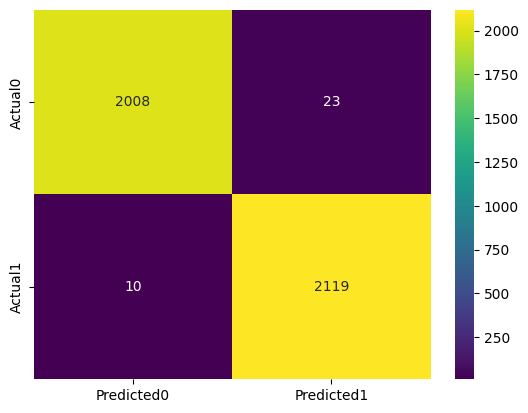

In [ ]:
plot2(Y_test, X_test_prediction)

In [ ]:
#Confusion Matrix compeleted

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(Y_test, X_test_prediction ))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2031
           1       0.99      1.00      0.99      2129

    accuracy                           0.99      4160
   macro avg       0.99      0.99      0.99      4160
weighted avg       0.99      0.99      0.99      4160



In [ ]:
true_positive = 2119
true_negative = 2008
false_positive = 23
false_negative = 10

In [ ]:
recall = true_positive/(true_positive + false_negative)
recall

0.9953029591357445

In [ ]:
precision = true_positive/(true_positive + false_positive)
precision

0.9892623716153128

In [ ]:
f1_score = (precision * recall / (precision + recall)) * 2
f1_score

0.9922734722547413

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, X_test_prediction))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2031
           1       0.99      1.00      0.99      2129

    accuracy                           0.99      4160
   macro avg       0.99      0.99      0.99      4160
weighted avg       0.99      0.99      0.99      4160



In [ ]:
plt.bar(np.arrange(4)-.1, skm.)